In [7]:
import pandas as pd
import requests
from time import sleep
import json
from shapely.geometry import shape



#Récupération des données des départements d'Ile de France sur l'api

In [8]:
url_departement = "https://geo.api.gouv.fr/regions/11/departements"
response_departement = requests.get(url_departement) 
data_departement = response_departement.json()
list_dep = []
for dep in data_departement:
        list_dep.append(dep['code'])
list_dep

['75', '77', '78', '91', '92', '93', '94', '95']

In [9]:
def load_geojson(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return json.load(file)

In [10]:
# Fonction pour exporter en GeoJSON
def export_geojson(data, file_path):
    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

In [11]:

    
# Charger les données depuis les fichiers
link = f"donnees_geo/dep.geojson"
dep = load_geojson(link)

# Filtrer les features pour ne garder que ceux dont le code est dans list_dep
dep_idf = {
    "type": "FeatureCollection",
    "features": [
        feature for feature in dep["features"]
        if feature["properties"]["code"] in list_dep
    ]
}

print(dep_idf)



# Utilisation de la fonction pour exporter dep_idf
export_geojson(dep_idf, 'donnees_geo/dep_idf.geojson')

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[2.5530565519414, 49.009816202999], [2.5657856607901, 49.012397786393], [2.5716715859606, 48.999841685023], [2.5803194899487, 48.991593137352], [2.5797962900593, 48.984984703781], [2.5634346213721, 48.977732430334], [2.5893050070876, 48.953758253881], [2.6025997962059, 48.929356607315], [2.5906912334031, 48.923361520931], [2.5912646006622, 48.906830121884], [2.5838172328399, 48.895410384217], [2.5626276286343, 48.888883251177], [2.5594064582352, 48.885336254164], [2.5702348571309, 48.876463404921], [2.568109258403, 48.865942675094], [2.5873261857605, 48.865005030869], [2.5831356251086, 48.857208607635], [2.5738417937528, 48.853385173417], [2.5925149932073, 48.825870860417], [2.5964557305467, 48.810889137262], [2.5922736733656, 48.807437551952], [2.574124871997, 48.8129126037], [2.5709791871159, 48.8226801571], [2.5313232159076, 48.844429712931], [2.4956483361361, 48.860848724

In [12]:
# # for dep in list_dep:
# dep = 77

# df_resultats_departement = pd.DataFrame()
# url_resultats_departement = f"https://hubeau.eaufrance.fr/api/v1/qualite_eau_potable/resultats_dis?code_departement={dep}&size=20000"

# while True :
#   if url_resultats_departement :
#     response_jdd_resultats_departement = requests.get(url_resultats_departement) 
#     data_resultats_departement = response_jdd_resultats_departement.json()
#     data_results_n = data_resultats_departement['data']
#     df_resultats_departement_n = pd.json_normalize(data_results_n)
#     df_resultats_departement = pd.concat([df_resultats_departement,df_resultats_departement_n])
#     url_resultats_departement = data_resultats_departement['next']
#     print(url_resultats_departement)
#     sleep(10)
    
#   else :
#     print('fini')
#     break
# df_resultats_departement.to_csv(f'export/a_ignorer/df_resultats_departement{dep}.csv', sep=';', index=False)
    

In [13]:
# sleep(600)
# df_resultats_departement = pd.DataFrame()
# for x in range(1,50) :
#     url = f'https://hubeau.eaufrance.fr/api/v1/qualite_eau_potable/resultats_dis?code_departement=77&page={x}&size=20000'
#     response_jdd_resultats_departement = requests.get(url) 
#     data_resultats_departement = response_jdd_resultats_departement.json()
#     data_results_n = data_resultats_departement['data']
#     df_resultats_departement_n = pd.json_normalize(data_results_n)
#     df_resultats_departement = pd.concat([df_resultats_departement,df_resultats_departement_n])
#     print(url)
#     sleep(1)
# df_resultats_departement.to_csv(f'export/a_ignorer/df_resultats_departement77_1.csv', sep=';', index=False)

In [14]:
# sleep(600)
# df_resultats_departement = pd.DataFrame()
# for x in range(50,100) :
#     url = f'https://hubeau.eaufrance.fr/api/v1/qualite_eau_potable/resultats_dis?code_departement=77&page={x}&size=20000'
#     response_jdd_resultats_departement = requests.get(url) 
#     data_resultats_departement = response_jdd_resultats_departement.json()
#     data_results_n = data_resultats_departement['data']
#     df_resultats_departement_n = pd.json_normalize(data_results_n)
#     df_resultats_departement = pd.concat([df_resultats_departement,df_resultats_departement_n])
#     print(url)
#     sleep(1)
# df_resultats_departement.to_csv(f'export/a_ignorer/df_resultats_departement77_2.csv', sep=';', index=False)

In [15]:
# sleep(600)

# df_resultats_departement = pd.DataFrame()
# for x in range(100,154) :
#     url = f'https://hubeau.eaufrance.fr/api/v1/qualite_eau_potable/resultats_dis?code_departement=77&page={x}&size=20000'
#     response_jdd_resultats_departement = requests.get(url) 
#     data_resultats_departement = response_jdd_resultats_departement.json()
#     data_results_n = data_resultats_departement['data']
#     df_resultats_departement_n = pd.json_normalize(data_results_n)
#     df_resultats_departement = pd.concat([df_resultats_departement,df_resultats_departement_n])
#     print(url)
#     sleep(1)
# df_resultats_departement.to_csv(f'export/a_ignorer/df_resultats_departement77_3.csv', sep=';', index=False)

# Récupération de la conclusion qualité pour le dernier prélèvement et l'historique

In [16]:
# Créer un dictionnaire pour stocker les DataFrames
dataframes = {}
liste_y = ['75', '77_1','77_2','77_3', '78', '91', '92', '93', '94', '95']

for y in liste_y:
    # Utiliser le f-string pour le nom du fichier
    filename = f'export/a_ignorer/df_resultats_departement{y}.csv'
    # Lire le fichier CSV et stocker le DataFrame dans le dictionnaire
    # La clé du dictionnaire sera 'qual_dep{code_departement}'
    dataframes[f'qual_dep{y}'] = pd.read_csv(filename, sep=';')

dataframes[f'qual_dep77'] = pd.concat([dataframes['qual_dep77_1'],dataframes['qual_dep77_2'],dataframes['qual_dep77_3']])
# Maintenant, vous pouvez accéder à chaque DataFrame comme ceci :
# dataframes['qual_dep01'], dataframes['qual_dep02'], etc.

    
    

In [17]:
def qualite_generale(x) :
    if x['conformite_limites_bact_prelevement'] == 'C'and x['conformite_limites_pc_prelevement']  == 'C' and x['conformite_references_bact_prelevement']== 'C' and x['conformite_references_pc_prelevement']== 'C':
        return 'Conforme aux limites et aux références'
    elif x['conformite_limites_bact_prelevement'] in ['C','S']and x['conformite_limites_pc_prelevement'] in ['C','S'] and  x['conformite_references_bact_prelevement']in ['C','S'] and x['conformite_references_pc_prelevement']in ['C','S']:
        return 'Conforme aux limites et aux références'
    elif x['conformite_limites_bact_prelevement'] in ['C','S']and x['conformite_limites_pc_prelevement'] in ['C','S'] and  (x['conformite_references_bact_prelevement']== 'D' and x['conformite_references_pc_prelevement'] == 'D'):
        return "Conforme aux limites et conforme aux références dans le cadre d'une dérogation"
    elif x['conformite_limites_bact_prelevement'] in ['C','S']and x['conformite_limites_pc_prelevement'] in ['C','S'] and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] == 'D':
        return "Conforme aux limites et conforme aux références dans le cadre d'une dérogation"
    elif x['conformite_limites_bact_prelevement'] in ['C','S']and x['conformite_limites_pc_prelevement'] in ['C','S'] and  x['conformite_references_bact_prelevement'] == 'D' and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Conforme aux limites et conforme aux références dans le cadre d'une dérogation"
    elif x['conformite_limites_bact_prelevement'] == 'D' and x['conformite_limites_pc_prelevement'] == 'D' and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Conforme aux limites dans le cadre d'une dérogation et conforme aux références"
    elif x['conformite_limites_bact_prelevement'] == 'D' and x['conformite_limites_pc_prelevement'] in ['C','S'] and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Conforme aux limites dans le cadre d'une dérogation et conforme aux références"
    elif x['conformite_limites_bact_prelevement'] in ['C','S'] and x['conformite_limites_pc_prelevement'] == 'D' and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Conforme aux limites dans le cadre d'une dérogation et conforme aux références "
    elif x['conformite_limites_bact_prelevement'] == 'N' and x['conformite_limites_pc_prelevement'] in ['C','S','D'] and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Non conforme aux limites et conforme aux références "
    elif x['conformite_limites_bact_prelevement'] in ['C','S','D'] and x['conformite_limites_pc_prelevement'] == 'N' and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Non conforme aux limites et conforme aux références "
    elif x['conformite_limites_bact_prelevement'] in ['N'] and x['conformite_limites_pc_prelevement'] == 'N' and  x['conformite_references_bact_prelevement'] in ['C','S'] and x['conformite_references_pc_prelevement'] in ['C','S']:
        return "Non conforme aux limites et conforme aux références "
    elif x['conformite_limites_bact_prelevement'] in ['C','S'] and x['conformite_limites_pc_prelevement']in ['C','S'] and  (x['conformite_references_bact_prelevement'] =='N' or  x['conformite_references_pc_prelevement'] =='N') :
        return "Conforme aux limites et non conforme aux références "
    elif x['conformite_limites_bact_prelevement'] == 'D' and x['conformite_limites_pc_prelevement']in ['C','S'] and  (x['conformite_references_bact_prelevement'] =='N' or  x['conformite_references_pc_prelevement'] =='N') :
        return "Conforme aux limites dans le cadre d'une dérogation et non conforme aux références "
    elif x['conformite_limites_bact_prelevement'] in ['C','S'] and x['conformite_limites_pc_prelevement']== 'D' and  (x['conformite_references_bact_prelevement'] =='N' or  x['conformite_references_pc_prelevement'] =='N') :
        return "Conforme aux limites dans le cadre d'une dérogation et non conforme aux références "
    elif (x['conformite_limites_bact_prelevement'] =='N' or x['conformite_limites_pc_prelevement'] == 'N' ) and  (x['conformite_references_bact_prelevement'] =='N' or x['conformite_references_pc_prelevement'] =='N'):
        return "Non conforme aux limites et non conforme aux références "
    else :
        return "Autre cas"

In [18]:
def transfo_conf(x):
    if str(x) == 'C':
        return 'Conforme'
    elif str(x) == 'N':
        return 'Non conforme'
    elif str(x) == 'D':
        return "Conforme dans le cadre d’une dérogation"
    elif str(x) == 'S':
        return "Sans objet"

In [19]:
for dep in list_dep :
    qual_dep_cc = dataframes[f'qual_dep{dep}'][['code_departement', 'nom_departement', 'code_commune', 'nom_commune','code_prelevement', 'date_prelevement', 'conclusion_conformite_prelevement','conformite_limites_bact_prelevement','conformite_limites_pc_prelevement','conformite_references_bact_prelevement','conformite_references_pc_prelevement']]
    qual_dep_cc['date_prelevement'] = pd.to_datetime(qual_dep_cc['date_prelevement'])
    qual_dep_historique = qual_dep_cc.drop_duplicates(subset=['code_departement', 'nom_departement', 'code_commune', 'nom_commune', 'code_prelevement','date_prelevement', 'conclusion_conformite_prelevement','conformite_limites_bact_prelevement','conformite_limites_pc_prelevement','conformite_references_bact_prelevement','conformite_references_pc_prelevement'])
    qual_dep_historique['qualite_generale'] = qual_dep_historique.apply(qualite_generale, axis=1)
    qual_dep_historique[['conformite_limites_bact_prelevement','conformite_limites_pc_prelevement',
           'conformite_references_bact_prelevement','conformite_references_pc_prelevement']] = qual_dep_historique[['conformite_limites_bact_prelevement','conformite_limites_pc_prelevement',
           'conformite_references_bact_prelevement','conformite_references_pc_prelevement']].applymap(transfo_conf)
    qual_dep_historique.sort_values('date_prelevement', ascending=False)
    qual_dep_last = qual_dep_historique.groupby(['code_commune']).first().reset_index()
      
    qual_dep_last.to_csv(f'export/df_resultats_last_departement{dep}.csv', sep=';', index=False)
    qual_dep_historique.to_csv(f'export/df_resultats_historique_departement{dep}.csv', sep=';', index=False)

C:\Users\LOTUS\AppData\Local\Temp\ipykernel_6068\561977009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual_dep_cc['date_prelevement'] = pd.to_datetime(qual_dep_cc['date_prelevement'])
C:\Users\LOTUS\AppData\Local\Temp\ipykernel_6068\561977009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual_dep_historique['qualite_generale'] = qual_dep_historique.apply(qualite_generale, axis=1)
C:\Users\LOTUS\AppData\Local\Temp\ipykernel_6068\561977009.py:8: FutureWarning: DataFrame.applymap has been deprec

In [20]:
historique_IDF = pd.DataFrame()

for dep in list_dep :
    historique_dep = pd.read_csv(f'export/df_resultats_historique_departement{dep}.csv', sep=';')
    historique_IDF = pd.concat([historique_IDF,historique_dep])

historique_IDF.to_csv(f'export/df_resultats_historique_IDF.csv', sep=';', index=False)


In [21]:
last_IDF = pd.DataFrame()

for dep in list_dep :
    last_dep = pd.read_csv(f'export/df_resultats_last_departement{dep}.csv', sep=';')
    last_IDF = pd.concat([last_IDF,last_dep])

last_IDF.to_csv('export/df_resultats_last_IDF.csv', sep=';', index=False)

In [22]:
def filter_non_point_features(geojson_data):
    geojson_data['features'] = [feature for feature in geojson_data['features'] if feature['geometry']['type'] != 'Point']
    return geojson_data

In [23]:
communes_idf={}
for dep in list_dep: 
    link_communes_dep = f'https://geo.api.gouv.fr/departements/{dep}/communes?format=geojson&geometry=contour&fields=code,nom,contour,centre,codeDepartement,departement,codeRegion,region'
    reponse_dep = requests.get(link_communes_dep)
    communes_api_dep = reponse_dep.json()
    communes_api_dep = filter_non_point_features(communes_api_dep)
    communes_idf[dep] = {
        'code_departement': dep,
        'communes': communes_api_dep
      }





In [24]:
# Parcourir les features pour calculer le centroïde
for dep in communes_idf:
    for feature in communes_idf[dep]['communes']['features']:
        geom = shape(feature['geometry'])
        centroid = geom.centroid
        feature['properties']['centroid'] = {
            'latitude': centroid.y,
            'longitude': centroid.x
        }

In [25]:
#Ajouter la qualité au geojson

qual_last = pd.read_csv('export/df_resultats_last_IDF.csv', sep=';')


In [26]:
# def clean_text(text):
#     return text.strip().replace('.', '').encode('latin1').decode('utf-8') if isinstance(text, str) else text

import unicodedata

def clean_text(text):
    if isinstance(text, str):
        # Normalisation Unicode (NFKC pour éviter les caractères spéciaux mal encodés)
        text = unicodedata.normalize("NFKC", text.strip().replace('.', ''))
        
        # Vérifier si le texte est mal encodé
        try:
            text = text.encode('utf-8').decode('utf-8')  # Vérifie si UTF-8 est correct
        except UnicodeDecodeError:
            try:
                text = text.encode('latin1').decode('utf-8')  # Essaye de convertir si nécessaire
            except UnicodeDecodeError:
                text = text  # Garder tel quel si la conversion échoue
        
        return text
    else:
        return "" if text is None else str(text)  # Gérer les NaN et None



In [27]:
for dep in communes_idf:
    # Créer une liste filtrée pour stocker uniquement les communes avec des données
    filtered_features = []

    for feature in communes_idf[dep]['communes']['features']:
        communes_code = feature['properties']['code']

        # Filtrer les données pour la commune correspondante
        qual_data = qual_last[qual_last['code_commune'].astype(str) == str(communes_code)]

        if not qual_data.empty:  # Vérifie que des données existent pour cette commune
            # Extraction de la première ligne correspondante
            row = qual_data.iloc[0]

            # Ajout des informations
            feature['properties']['qualite_generale'] = clean_text(row['qualite_generale'])
            feature['properties']['date_prelevement'] = clean_text(row['date_prelevement'])
            feature['properties']['com_qualite'] = clean_text(row['conclusion_conformite_prelevement'])
            feature['properties']['conformite_limites_bact_prelevement'] = clean_text(row['conformite_limites_bact_prelevement'])
            feature['properties']['conformite_limites_pc_prelevement'] = clean_text(row['conformite_limites_pc_prelevement'])
            feature['properties']['conformite_references_bact_prelevement'] = clean_text(row['conformite_references_bact_prelevement'])
            feature['properties']['conformite_references_pc_prelevement'] = clean_text(row['conformite_references_pc_prelevement'])

            # Ajouter cette commune à la liste filtrée
            filtered_features.append(feature)

    # Remplacer les features par la liste filtrée (ne contient que les communes avec données)
    communes_idf[dep]['communes']['features'] = filtered_features



In [28]:
prix_aep = pd.read_csv('export/a_ignorer/tarifs_eau_potable.csv')
prix_aep.sample(5)

,Commune,Departement,Code INSEE,D102.0,Année
12486,Poigny-la-Forêt,78,78497,4.10,2022
5829,Étréchy,91,91226,NaN,2016
10031,Montigny-Lencoup,77,77311,5.17,2020
5894,Ballancourt-sur-Essonne,91,91045,3.35,2017
4287,Orsay,91,91471,NaN,2015


In [41]:
prix_ac = pd.read_csv('export/a_ignorer/tarifs_assainissement.csv')
prix_ac.sort_values('Année', ascending=False)

,Commune,Departement,Code INSEE,D204.0,Année
13977,Wissous,91,91689,NaN,2023
13986,Élancourt,78,78208,NaN,2023
14003,Ézanville,95,95229,NaN,2023
14002,Évry-Grégy-sur-Yerre,77,77175,NaN,2023
13985,Égreville,77,77168,NaN,2023
...,...,...,...,...,...
58,Ballainvilliers,91,91044,NaN,2012
57,Bailly-Romainvilliers,77,77018,NaN,2012
56,Bailly,78,78043,NaN,2012
55,Baillet-en-France,95,95042,NaN,2012


In [64]:
prix_total = pd.merge(prix_aep,
                      prix_ac,
                      how="outer",
                      on=["Code INSEE","Année"])
prix_total

,Commune_x,Departement_x,Code INSEE,D102.0,Année,Commune_y,Departement_y,D204.0
0,Paris,75,75056,1.75,2012,Paris,75,1.54
1,Paris,75,75056,1.76,2013,Paris,75,1.65
2,Paris,75,75056,1.73,2014,Paris,75,1.73
3,Paris,75,75056,1.74,2015,Paris,75,1.77
4,Paris,75,75056,1.79,2016,Paris,75,1.83
...,...,...,...,...,...,...,...,...
13999,Villiers-le-Sec,95,95682,3.78,2019,Villiers-le-Sec,95,NaN
14000,Villiers-le-Sec,95,95682,3.65,2020,Villiers-le-Sec,95,NaN
14001,Villiers-le-Sec,95,95682,3.80,2021,Villiers-le-Sec,95,NaN
14002,Villiers-le-Sec,95,95682,NaN,2022,Villiers-le-Sec,95,NaN


In [ ]:
prix_total=prix_total.drop(columns=['Commune_y','Departement_y'], axis=1)

In [69]:
prix_total= prix_total.rename(columns={'Commune_x': 'Commune', 'Departement_x': 'Departement'})
prix_total

,Commune,Departement,Code INSEE,D102.0,Année,D204.0
0,Paris,75,75056,1.75,2012,1.54
1,Paris,75,75056,1.76,2013,1.65
2,Paris,75,75056,1.73,2014,1.73
3,Paris,75,75056,1.74,2015,1.77
4,Paris,75,75056,1.79,2016,1.83
...,...,...,...,...,...,...
13999,Villiers-le-Sec,95,95682,3.78,2019,NaN
14000,Villiers-le-Sec,95,95682,3.65,2020,NaN
14001,Villiers-le-Sec,95,95682,3.80,2021,NaN
14002,Villiers-le-Sec,95,95682,NaN,2022,NaN


In [80]:
if prix_total['D102.0'] is not None and prix_total['D204.0'] is not None:
    prix_total['prix_total']= round(prix_total['D102.0']+prix_total['D204.0'],2)
else:
    prix_total['prix_total'] = None 

prix_total

,Commune,Departement,Code INSEE,D102.0,Année,D204.0,prix_total
0,Paris,75,75056,1.75,2012,1.54,3.29
1,Paris,75,75056,1.76,2013,1.65,3.41
2,Paris,75,75056,1.73,2014,1.73,3.46
3,Paris,75,75056,1.74,2015,1.77,3.51
4,Paris,75,75056,1.79,2016,1.83,3.62
...,...,...,...,...,...,...,...
13999,Villiers-le-Sec,95,95682,3.78,2019,NaN,NaN
14000,Villiers-le-Sec,95,95682,3.65,2020,NaN,NaN
14001,Villiers-le-Sec,95,95682,3.80,2021,NaN,NaN
14002,Villiers-le-Sec,95,95682,NaN,2022,NaN,NaN


In [81]:
prix_total.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14004 entries, 0 to 14003
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Commune      14004 non-null  object 
 1   Departement  14004 non-null  int64  
 2   Code INSEE   14004 non-null  int64  
 3   D102.0       9418 non-null   float64
 4   Année        14004 non-null  int64  
 5   D204.0       3092 non-null   float64
 6   prix_total   2759 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 875.2+ KB


In [82]:
for dep in list_dep: 
    tarif_dep = prix_total[prix_total['Departement'] == int(dep)]
    tarif_dep.to_csv(f'export/tarif_dep{dep}.csv', sep=";", index=False)
    tarif_dep_2023 = prix_total[(prix_total['Departement'] == int(dep))&(prix_total['Année'] == 2023)]
    tarif_dep_2023.to_csv(f'export/tarif_dep{dep}_2023.csv', sep=";", index=False)

In [ ]:
import numpy as np

for dep in communes_idf:
    for feature in communes_idf[dep]['communes']['features']:
        communes_code = feature['properties']['code']
        # print(communes_code)

        # Filtrer les données pour la commune correspondante
        prix_aep_com = prix_aep[(prix_aep['Code INSEE'].astype(str) == str(communes_code)) & (prix_aep['Année'] == 2023)]
        prix_ac_com = prix_ac[(prix_ac['Code INSEE'].astype(str) == str(communes_code)) & (prix_ac['Année'] == 2023)]

        if not prix_aep_com.empty:  # Vérifie que des données existent pour cette commune
            row_aep = prix_aep_com.iloc[0]
            row_ac = prix_ac_com.iloc[0]

            # Conversion en float standard et gestion des NaN
            prix_aep_value = float(row_aep['D102.0']) if not np.isnan(row_aep['D102.0']) else None
            prix_ac_value = float(row_ac['D204.0']) if not np.isnan(row_ac['D204.0']) else None

            # Calcul de la somme en gérant les None
            if prix_aep_value is not None and prix_ac_value is not None:
                prix_total = round(prix_aep_value + prix_ac_value,2)
            else:
                prix_total = None  

            # Ajout des informations
            feature['properties']['prix_aep'] = prix_aep_value
            feature['properties']['prix_ac'] = prix_ac_value
            feature['properties']['prix_total'] = prix_total




In [57]:
# Utilisation de la fonction pour exporter communes_idf
export_geojson(communes_idf, 'donnees_geo/communes_idf.geojson')

In [58]:
for dep in list_dep : 
    communes_idf_dep = communes_idf[dep]
    export_geojson(communes_idf_dep, f'donnees_geo/communes_idf_{dep}.geojson')

In [33]:
import os

print("Répertoire de travail actuel :", os.getcwd())

Répertoire de travail actuel : d:\LOTUS\Documents\Formation_data_analyst\Cours\projets\projet3\github\AquaVision


In [59]:
link = f"donnees_geo/communes_idf_78.geojson"
communes_78 = load_geojson(link)

In [84]:
tarif_com = pd.read_csv('export/tarif_dep75.csv', sep=";")
tarif_com

,Commune,Departement,Code INSEE,D102.0,Année,D204.0,prix_total
0,Paris,75,75056,1.75,2012,1.54,3.29
1,Paris,75,75056,1.76,2013,1.65,3.41
2,Paris,75,75056,1.73,2014,1.73,3.46
3,Paris,75,75056,1.74,2015,1.77,3.51
4,Paris,75,75056,1.79,2016,1.83,3.62
5,Paris,75,75056,1.79,2017,1.89,3.68
6,Paris,75,75056,1.76,2018,1.86,3.62
7,Paris,75,75056,1.75,2019,1.86,3.61
8,Paris,75,75056,1.76,2020,1.86,3.62
9,Paris,75,75056,1.76,2021,1.92,3.68


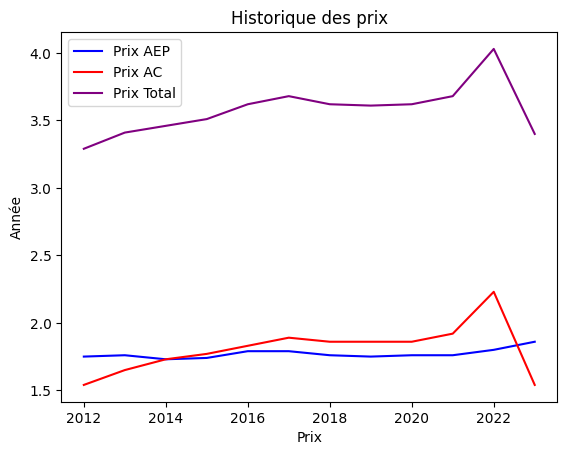

c:\Users\LOTUS\anaconda3\envs\projet3\Lib\site-packages\plotly\matplotlylib\renderer.py:571: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

c:\Users\LOTUS\anaconda3\envs\projet3\Lib\site-packages\plotly\matplotlylib\renderer.py:609: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.tools as tls

def graph_prix(dep, commune)
    tarif_dep = pd.read_csv('export/tarif_dep{dep}.csv', sep=";")
    tarif_com = tarif_dep[tarif_dep['Code INSEE']== int(commune)]

    # Création du graphique
    fig, ax = plt.subplots()
    sns.lineplot(data=tarif_com, x='Année', y='D102.0', label="Prix AEP", color="blue")
    sns.lineplot(data=tarif_com, x='Année', y='D204.0', label="Prix AC", color="red")
    sns.lineplot(data=tarif_com, x='Année', y='prix_total', label="Prix Total", color="purple")

    # Personnalisation
    plt.xlabel("Prix")
    plt.ylabel("Année")
    plt.title("Historique des prix")
    plt.legend()
    plt.show()

    # Convertir la figure Matplotlib en Plotly
    plotly_fig = tls.mpl_to_plotly(fig)

    # Sauvegarde en HTML
    pio.write_html(plotly_fig, "export/graphique.html")




In [ ]:
import plotly.express as pk
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Création de la figure
fig = go.Figure()

# Ajouter plusieurs courbes
fig.add_trace(go.Scatter(x=tarif_com['Année'], y=tarif_com['D102.0'], mode='lines', name='Prix Eau potable', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=tarif_com['Année'], y=tarif_com['D204.0'], mode='lines', name='Prix Assainissement', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=tarif_com['Année'], y=tarif_com['prix_total'], mode='lines', name='Prix total', line=dict(color='purple', dash='dot')))

# Personnalisation
fig.update_layout(
    title="Historique des prix",
    xaxis_title="Année",
    yaxis_title="Prix",
    template="plotly",  # Autres options : "plotly", "ggplot2", "seaborn", "plotly_dark", etc.
    legend=dict(title="Légende")
)
# Afficher
fig.show()
